## Retorno Acumulado
Una tremenda forma para comparar el desempeño de dos activos es poner sobre la mesa el retorno acumulado de ambos. Para poner en práctica el cálculo del retorno acumulado se utilizarán dos empresas completamente distintas: Alphabet y Texas RoadHouse.

In [42]:
# librerias indispensables para trabajar
import pandas as pd
import datetime as dt
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

In [43]:
# definimos un rango de fecha
start = dt.datetime(2017,3,22)
end = dt.datetime.now()

In [44]:
# obteniendo precio de cierre de ambos activos
stocks = ['TXRH', 'GOOGL']
close_price = pdr.get_data_yahoo(stocks, start, end)['Close']
close_price.head()

[*********************100%***********************]  2 of 2 completed


,GOOGL,TXRH
Date,,
2017-03-22 00:00:00-04:00,42.490002,43.230000
2017-03-23 00:00:00-04:00,41.982498,43.529999
2017-03-24 00:00:00-04:00,41.757000,43.529999
2017-03-27 00:00:00-04:00,41.925499,43.270000
2017-03-28 00:00:00-04:00,42.031502,44.139999


In [45]:
# nos interesa el retorno diario, para luego calcular el retorno acumulado
returns = close_price.pct_change()
returns.tail()

,GOOGL,TXRH
Date,,
2023-03-16 00:00:00-04:00,0.043804,0.031808
2023-03-17 00:00:00-04:00,0.012959,-0.024995
2023-03-20 00:00:00-04:00,-0.003936,0.009020
2023-03-21 00:00:00-04:00,0.036554,0.001223
2023-03-22 00:00:00-04:00,-0.014773,-0.001316


In [46]:
# calculando retorno acumulado
cumulative_returns = (1+returns).cumprod()-1
cumulative_returns.tail()

,GOOGL,TXRH
Date,,
2023-03-16 00:00:00-04:00,1.361026,1.498728
2023-03-17 00:00:00-04:00,1.391622,1.436271
2023-03-20 00:00:00-04:00,1.382208,1.458247
2023-03-21 00:00:00-04:00,1.469287,1.461254
2023-03-22 00:00:00-04:00,1.432808,1.458015


Durante los últimos 6 años, un restaurante especializado en carne asada, con un market cap al 22/3/23 de $7,121 millones, generó un rendimiento levemente superior que Alphabet, un gigante técnológico valorado por sobre el trillón de dólares.

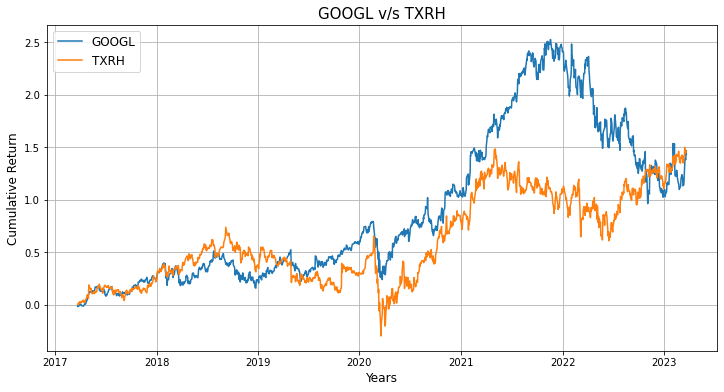

In [48]:
# a graficar la data
import matplotlib.pyplot as plt
%matplotlib inline

googl = cumulative_returns['GOOGL']
txrh = cumulative_returns['TXRH']

plt.figure(figsize=(12, 6)) # tamaño del gráfico
plt.plot(googl, label='GOOGL')
plt.plot(txrh, label='TXRH')

plt.title('GOOGL v/s TXRH', fontsize=15) # título
plt.ylabel('Cumulative Return', fontsize=12) # etiqueta eje y
plt.xlabel('Years', fontsize=12) # etiqueta eje x
plt.legend(loc=2, fontsize=12) 
plt.grid() # cuadrículas
plt.show()